#Bike Details Datase

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/content/BIKE DETAILS (1).csv")

In [6]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Q.1 What is the range of selling prices in the datasetD ?

In [39]:
min = df['selling_price'].min()
max = df['selling_price'].max()
range = max - min
print(range)

755000


Q.2 What is the median selling price for bikes in the datasetD?

In [27]:
median_selling_price = df['selling_price'].median()
print(median_selling_price)

45000.0


Q.3 What is the most common seller typeD?

In [37]:
most_common_seller_type_ID = df['seller_type'].mode()[0]
print(most_common_seller_type_ID)

Individual


Q.4 How many bikes have driven more than 50,000 kilometersD?

In [45]:
bikes_driven_more_than_50000 = len(df[df['km_driven'] > 500000])
print(bikes_driven_more_than_50000)

3


Q.5 What is the average km_driven value for each ownership typeD?

In [48]:
avg_km_per_owner = df.groupby("owner")["km_driven"].mean()
print(avg_km_per_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Q.6  What proportion of bikes are from the year 2015 or older?

In [50]:
total_bikes = len(df)
older_bikes = len(df[df["year"] <= 2015])
proportion = older_bikes / total_bikes
print(proportion)

0.5664467483506126


Q.7 What is the trend of missing values across the datasetD?

In [55]:
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage Missing": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

print(missing_summary)

                   Missing Values  Percentage Missing
ex_showroom_price             435           40.999057
name                            0            0.000000
selling_price                   0            0.000000
year                            0            0.000000
seller_type                     0            0.000000
owner                           0            0.000000
km_driven                       0            0.000000


Q.8 What is the highest ex_showroom_price recorded, and for which bikeD?

In [63]:
max_price_row = df.loc[df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]
print("Bike with the highest ex_showroom_price:")
print(max_price_row)

Bike with the highest ex_showroom_price:
name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


Q.9 What is the total number of bikes listed by each seller typeD?

In [64]:
bikes_per_seller_type = df['seller_type'].value_counts()
print("Total Bikes Listed by Each Seller Type:")
print(bikes_per_seller_type)

Total Bikes Listed by Each Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Q.10 What is the relationship between selling_price and km_driven for first-owner bikesD?

In [67]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

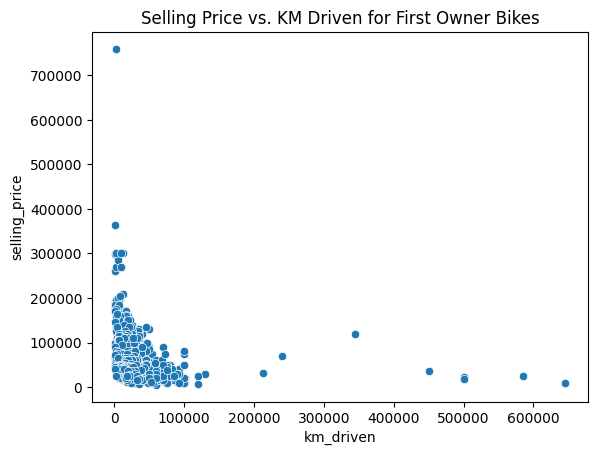

In [71]:
sns.scatterplot(data=df[df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.title("Selling Price vs. KM Driven for First Owner Bikes")
plt.show()

Q.11 Identify and remove outliers in the km_driven column using the IQR methodB.

In [72]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]
print("Outliers in km_driven removed using IQR method.")

Outliers in km_driven removed using IQR method.


Q.12 Perform a bivariate analysis to visualize the relationship between year and selling_priceB.

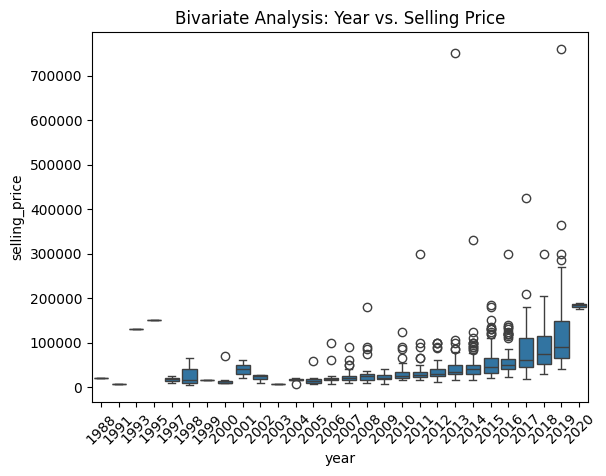

In [73]:
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title("Bivariate Analysis: Year vs. Selling Price")
plt.show()


Q.13  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year) ?

In [74]:
current_year = 2025
df['age'] = current_year - df['year']
depreciation = df.groupby('age')['selling_price'].mean()
print("Average Depreciation in Selling Price Based on Bike's Age:")
print(depreciation)

Average Depreciation in Selling Price Based on Bike's Age:
age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


Q.14 Which bike names are priced significantly above the average price for their manufacturing yearD?

In [75]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()
above_avg_bikes = df[df.apply(lambda row: row['selling_price'] > avg_price_by_year[row['year']], axis=1)]
print("Bikes Priced Significantly Above Average for Their Manufacturing Year:")
print(above_avg_bikes[['name', 'year', 'selling_price']])

Bikes Priced Significantly Above Average for Their Manufacturing Year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


Q.15  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

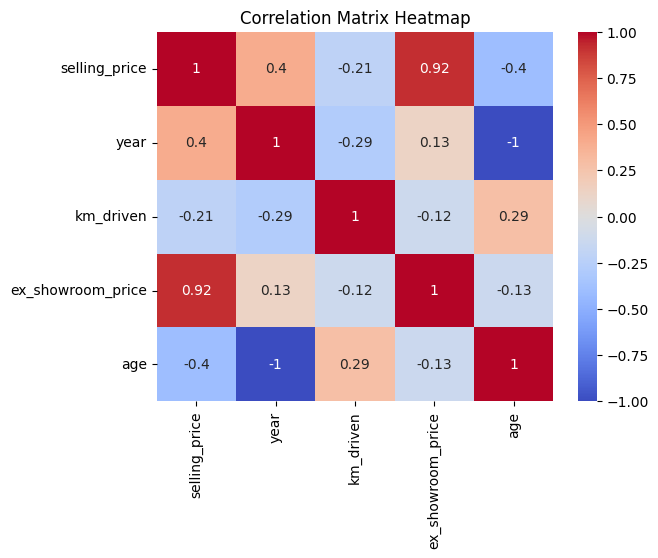

In [76]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

#Car Sale Dataset

In [78]:
df2 = pd.read_csv('/content/Car Sale.csv')

In [79]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [81]:
df2.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Q.1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [86]:
df2['Price ($)'] = pd.to_numeric(df2['Price ($)'], errors='coerce')

dealer_avg_price = df2.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
dealer_avg_price

,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


Q.2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [87]:
company_price_variation = df2.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
company_price_variation

,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


Q.3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

In [89]:
transmission_price_distribution = df2.groupby('Transmission')['Price ($)'].describe()[['25%', '50%', '75%']]
transmission_price_distribution

,25%,50%,75%
Transmission,,,
Auto,19000.0,24000.0,35500.0
Manual,17000.0,22001.0,34000.0


Q.4  What is the distribution of car prices across different regions?

In [91]:
region_price_distribution = df2.groupby('Dealer_Region')['Price ($)'].describe()[['25%', '50%', '75%']]
region_price_distribution

,25%,50%,75%
Dealer_Region,,,
Aurora,18001.0,23000.0,35000.0
Austin,18001.0,23801.0,35001.0
Greenville,18001.0,22500.0,34500.0
Janesville,18001.0,23000.0,34000.0
Middletown,18000.0,22750.0,34000.0
Pasco,18500.5,23000.0,34000.0
Scottsdale,18000.0,22600.0,33500.0


Q.5 What is the distribution of cars based on body styles?

In [92]:
body_style_distribution = df2['Body Style'].value_counts()
body_style_distribution

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


Q.6 How does the average selling price of cars vary by customer gender and annual income?

In [93]:
gender_price_distribution = df2.groupby('Gender')['Price ($)'].mean()
income_brackets = pd.qcut(df2['Annual Income'], q=4, labels=["Low", "Medium", "High", "Very High"])
income_price_distribution = df2.groupby(income_brackets)['Price ($)'].mean()

Q.7  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [94]:
region_car_count = df2['Dealer_Region'].value_counts()
region_car_count

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Middletown,3128
Greenville,3128


Q.8 How does the average car price differ between cars with different engine sizes?

In [96]:
engine_avg_price = df2.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
engine_avg_price

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


Q.9  How do car prices vary based on the customer’s annual income bracket?

In [97]:
income_price_variation = df2.groupby(income_brackets)['Price ($)'].std()
income_price_variation

,Price ($)
Annual Income,
Low,14953.112938
Medium,14612.713940
High,14967.662327
Very High,14618.748518


Q.10 What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [98]:
top_5_models = df2['Model'].value_counts().head(5).index
top_5_models_price_distribution = df2[df2['Model'].isin(top_5_models)].groupby('Model')['Price ($)'].describe()
top_5_models_price_distribution

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
Diamante,418.0,22268.303828,9770.768958,12000.0,18000.0,19001.0,22000.0,49801.0
Passat,391.0,19600.728900,8218.521683,9000.0,12001.0,20000.0,27001.0,32501.0
Prizm,411.0,22838.457421,8012.531045,15000.0,16000.0,22000.0,25000.0,44700.0
Ram Pickup,383.0,27820.864230,13297.609534,16000.0,19000.0,21000.0,39300.0,57750.0
Silhouette,411.0,29858.513382,17940.571762,12000.0,14001.0,25000.0,34500.0,60750.0


Q.11 How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

In [99]:
color_price_variation = df2.groupby('Color')['Price ($)'].std()
engine_color_price_distribution = df2.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

Q.12 Is there any seasonal trend in car sales based on the date of sale?

In [100]:
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
df2['Month'] = df2['Date'].dt.month
monthly_sales = df2['Month'].value_counts().sort_index()
monthly_sales

,count
Month,
1,790
2,735
3,1535
4,1655
5,1895
6,1715
7,1725
8,1705
9,3305


Q.13 How does the car price distribution change when considering different combinations of body style and
transmission typ?

In [101]:
body_trans_price_distribution = df2.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()[['25%', '50%', '75%']]
body_style_distribution

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


Q.14 What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

In [102]:
df2_numeric = df2[['Price ($)', 'Annual Income']].dropna()
correlation_matrix = df2_numeric.corr()
correlation_matrix

,Price ($),Annual Income
Price ($),1.000000,0.012065
Annual Income,0.012065,1.000000


Q.15 How does the average car price vary across different car models and engine types?

In [103]:
model_engine_price = df2.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
model_engine_price

Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
...,...,...
Viper,32118.479167,26052.375000
Voyager,22066.026316,33995.678322
Windstar,25145.636364,17100.272727


#Amazon Sales Data

In [104]:
df = pd.read_csv('/content/amazon.csv')

In [105]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [106]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [107]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [108]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

Q.1 What is the average rating for each product category?

In [109]:
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating_by_category

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5
...,...
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.6
"Electronics|HomeTheater,TV&Video|Accessories|3DGlasses",3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5


Q.2 What are the top rating_count products by category?

In [110]:
top_rating_count_by_category = df.loc[df.groupby('category')['rating_count'].idxmax(), ['category', 'product_name', 'rating_count']]
top_rating_count_by_category

,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4426.0
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,7222.0
748,Computers&Accessories|Accessories&Peripherals|...,JBL Commercial CSLM20B Auxiliary Omnidirection...,14969.0
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,7352.0
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,5792.0
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",6199.0
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,5719.0
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10",4308.0


Q.3 What is the distribution of discounted prices vs. actual price?

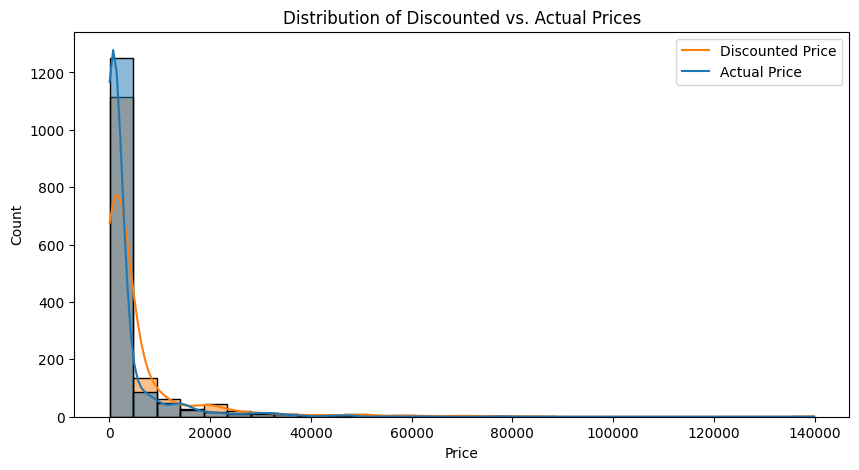

In [111]:
plt.figure(figsize=(10, 5))
sns.histplot(df[['discounted_price', 'actual_price']], kde=True, bins=30)
plt.title("Distribution of Discounted vs. Actual Prices")
plt.xlabel("Price")
plt.legend(["Discounted Price", "Actual Price"])
plt.show()

Q.4 How does the average discount percentage vary across categories?

In [112]:
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
avg_discount_by_category

,discount_percentage
category,
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.0
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.0
"Electronics|Headphones,Earbuds&Accessories|Adapters",88.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",87.5
...,...
OfficeProducts|OfficeElectronics|Calculators|Basic,0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAccessories,0.0
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,0.0


Q.5 What are the most popular product names?

In [113]:
top_products = df[['product_name', 'rating_count']].nlargest(10, 'rating_count')
top_products

,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832.0


Q.6 What are the most popular product keywords?

In [114]:
from collections import Counter
import itertools

words = list(itertools.chain(*df['product_name'].str.split()))
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
most_common_words

[('with', 718),
 ('for', 614),
 ('|', 457),
 ('&', 432),
 ('USB', 342),
 ('and', 310),
 ('Cable', 306),
 ('-', 220),
 ('Charging', 212),
 ('Fast', 208)]

Q.7 What are the most popular product review?

In [115]:
top_reviews = df[['review_content', 'rating_count']].nlargest(10, 'rating_count')
top_reviews

,review_content,rating_count
12,I am using it for 14 days now. The experience ...,426973.0
47,I am using it for 14 days now. The experience ...,426973.0
65,I am using it for 14 days now. The experience ...,426973.0
684,I am using it for 14 days now. The experience ...,426972.0
352,The sound quality of this earphone are really ...,363713.0
400,The sound quality of this earphone are really ...,363713.0
584,The sound quality of this earphone are really ...,363711.0
370,If you want a smart phone for just the use of ...,313836.0
371,If you want a smart phone for just the use of ...,313836.0
473,If you want a smart phone for just the use of ...,313832.0


Q.8 What is the correlation between discounted_price and rating?

In [116]:
correlation_price_rating = df[['discounted_price', 'rating']].corr().iloc[0, 1]
correlation_price_rating

0.12033741712288648

Q.9  What are the Top 5 categories based on the highest rating?

In [117]:
top_categories_by_rating = avg_rating_by_category.head(5)
top_categories_by_rating

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5


Q.10  Identify any potential areas for improvement or optimization based on the data analysis?

In [119]:
low_rating_categories = avg_rating_by_category[avg_rating_by_category < 3.5]
low_discount_categories = avg_discount_by_category[avg_discount_by_category < 20]

#Spotify DataSet

In [ ]:
df = pd.read_csv('/content/spotify.csv')

In [121]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [122]:
df.shape

(440, 5)

Q.1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful?

In [123]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows Before Removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate Rows After Removal:", df.duplicated().sum())

Missing Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate Rows Before Removal: 27
Duplicate Rows After Removal: 0


Q.2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

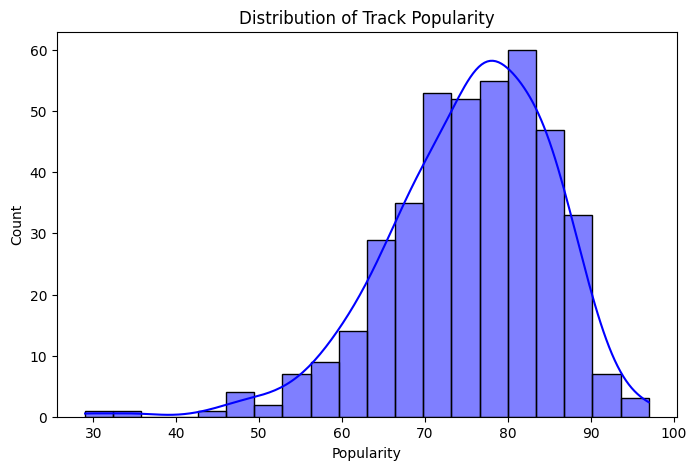

In [124]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Popularity"], bins=20, kde=True, color="blue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

Q.3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

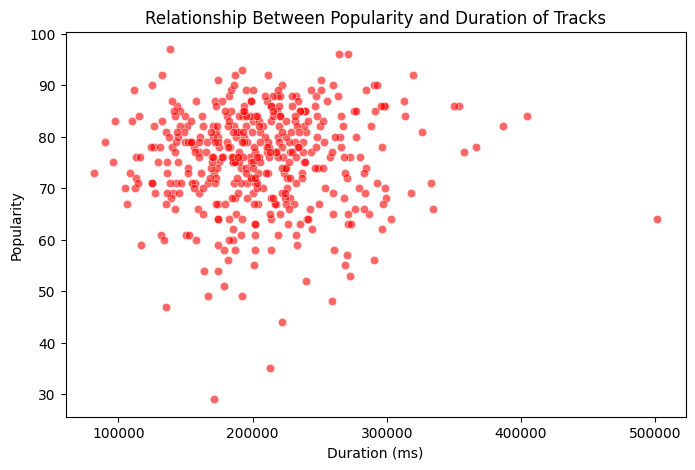

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.6, color="red")
plt.title("Relationship Between Popularity and Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


Q.4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?

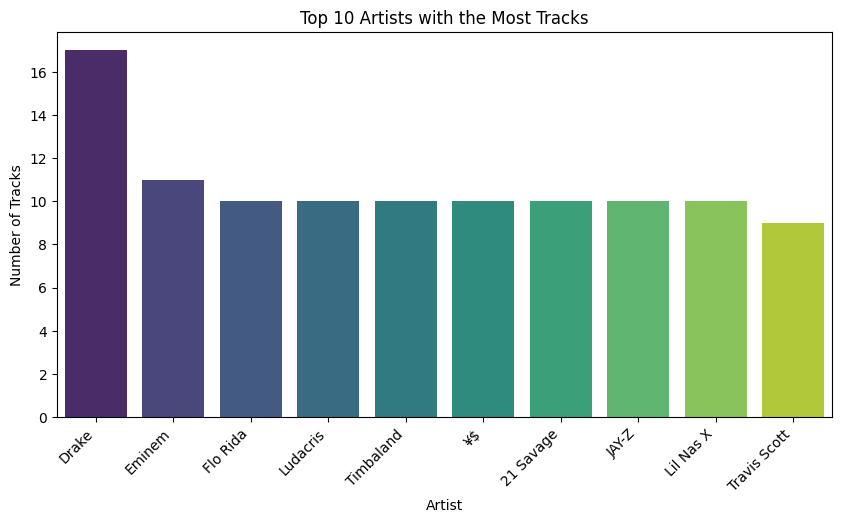

In [126]:
plt.figure(figsize=(10, 5))
top_artists = df["Artist"].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Artists with the Most Tracks")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.show()

Q.5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [127]:
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)

Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


Q.6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist?

In [128]:
top_5_artists = df.groupby("Artist")["Popularity"].mean().nlargest(5)
print("Top 5 Most Popular Artists by Average Popularity:\n", top_5_artists)

Top 5 Most Popular Artists by Average Popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


Q.7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [129]:
most_popular_tracks = df.loc[df.groupby("Artist")["Popularity"].idxmax(), ["Artist", "Track Name", "Popularity"]]
most_popular_tracks = most_popular_tracks[most_popular_tracks["Artist"].isin(top_5_artists.index)]
print("Most Popular Tracks of the Top 5 Artists:\n", most_popular_tracks)

Most Popular Tracks of the Top 5 Artists:
            Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


Q.8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.

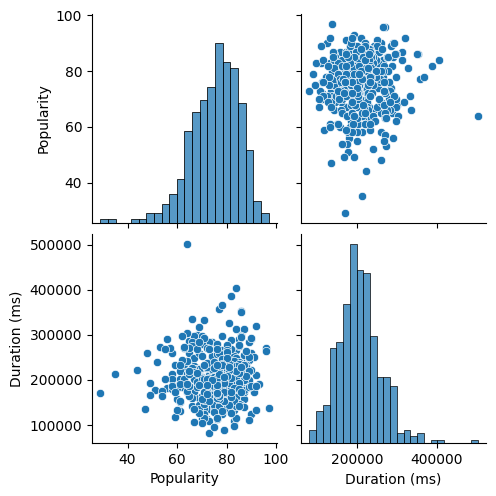

In [130]:
sns.pairplot(df[["Popularity", "Duration (ms)"]])
plt.show()

Q.9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

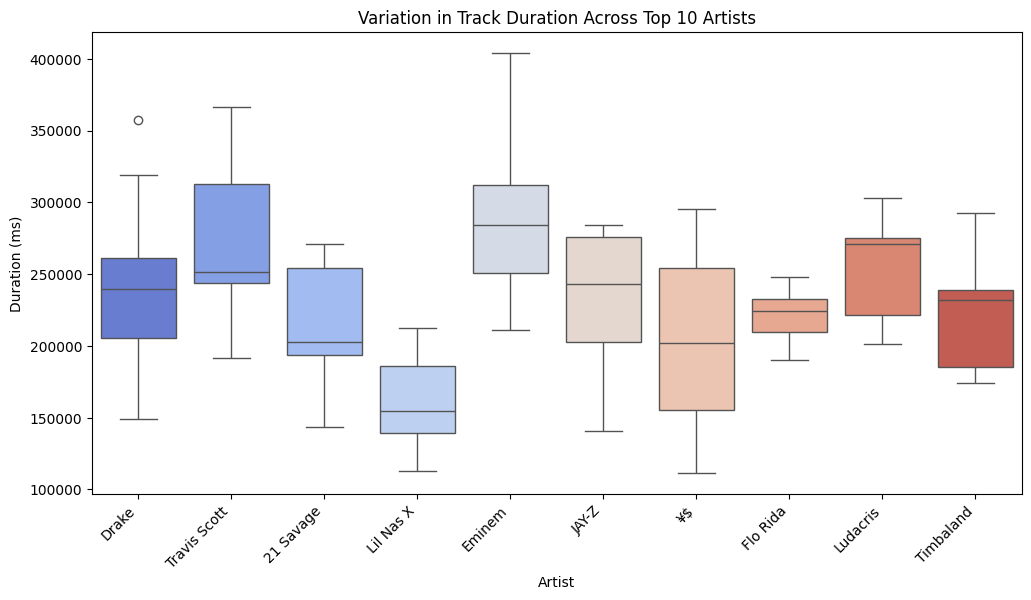

In [131]:
plt.figure(figsize=(12, 6))
top_10_artists = df["Artist"].value_counts().index[:10]
sns.boxplot(x=df[df["Artist"].isin(top_10_artists)]["Artist"],
            y=df[df["Artist"].isin(top_10_artists)]["Duration (ms)"], palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Variation in Track Duration Across Top 10 Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()


Q.10  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot?

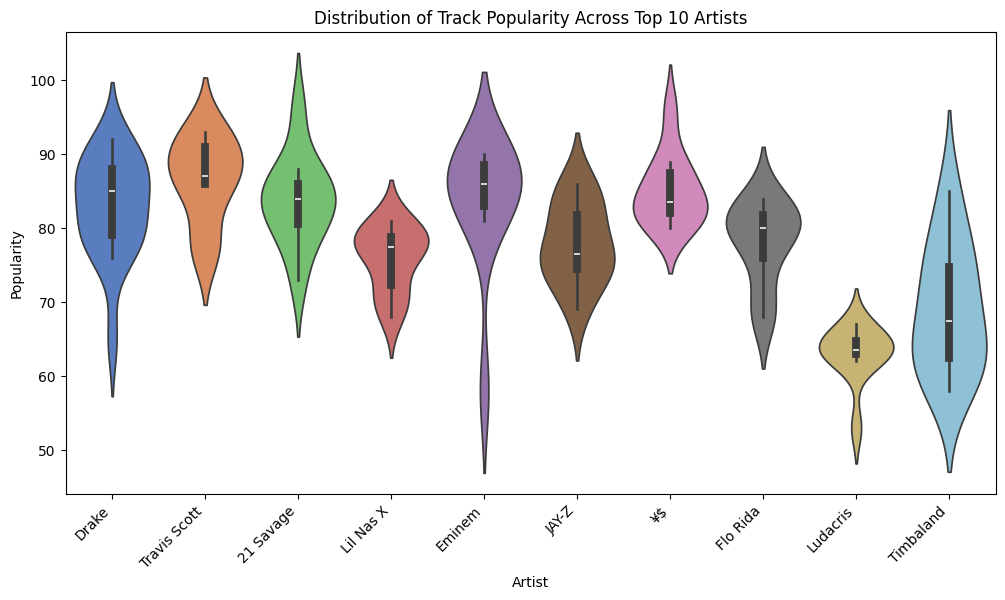

In [132]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df[df["Artist"].isin(top_10_artists)]["Artist"],
               y=df[df["Artist"].isin(top_10_artists)]["Popularity"], palette="muted")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Track Popularity Across Top 10 Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()
